In [2]:
from google.colab import files
uploaded=files.upload()

Saving output.csv to output.csv


In [1]:
import pandas as pd
data=pd.read_csv("output.csv")

In [2]:
data.head()

,id,app_id,content,author_id,is_positive
0,181331361,100,At least its a counter strike -1/100,76561199556485100,Negative
1,180872601,100,Uh... So far my playthrough has not been great...,76561199230620391,Negative
2,177836246,100,Better mechanics than cs2,76561198417690647,Negative
3,177287444,100,buggy mess and NOT fun to play at all,76561199077268730,Negative
4,176678990,100,"Whoever came up with this, is gonna fucking ge...",76561199104544266,Negative


In [3]:
data=data[['content','is_positive']]

In [4]:
data.isnull().sum()

,0
content,428
is_positive,0


In [5]:
data=data.dropna()

In [6]:
data.isnull().sum()

,0
content,0
is_positive,0


In [7]:
data.head()

,content,is_positive
0,At least its a counter strike -1/100,Negative
1,Uh... So far my playthrough has not been great...,Negative
2,Better mechanics than cs2,Negative
3,buggy mess and NOT fun to play at all,Negative
4,"Whoever came up with this, is gonna fucking ge...",Negative


In [8]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

In [9]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [10]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()


def preprocess_text(text):
    # Convert to lowercase
    text = str(text).lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatize tokens
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    # Join tokens back into a single string
    return ' '.join(tokens)

In [11]:
data['content'] = data['content'].apply(preprocess_text)

In [12]:
data.head()

,content,is_positive
0,least counter strike 1100,Negative
1,uh far playthrough great glitched texture cont...,Negative
2,better mechanic cs2,Negative
3,buggy mess fun play,Negative
4,whoever came gon na fucking get negative revie...,Negative


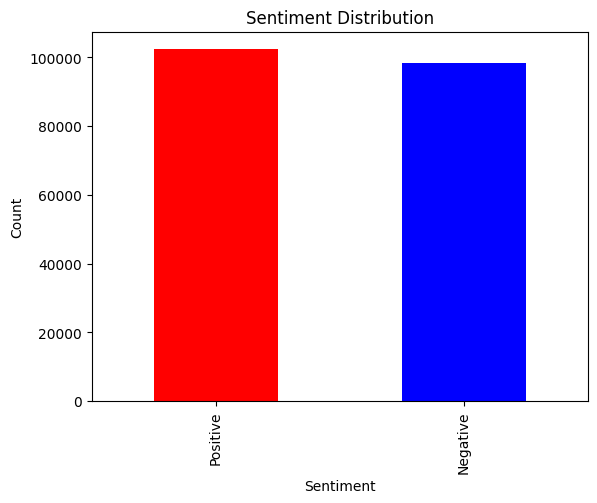

In [13]:
import matplotlib.pyplot as plt
data['is_positive'].value_counts().plot(kind='bar', color=['red', 'blue'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=5000)

# Transform the 'processed_content' column
X = vectorizer.fit_transform(data['content']).toarray()

# Convert 'is_positive' to numerical labels
y = data['is_positive'].apply(lambda x: 1 if x == "Positive" else 0)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [16]:
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [17]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8334786399302528
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.79      0.82     19656
           1       0.81      0.87      0.84     20489

    accuracy                           0.83     40145
   macro avg       0.84      0.83      0.83     40145
weighted avg       0.84      0.83      0.83     40145



In [19]:
def predict_sentiment(sentence):
    # Preprocess the input sentence (similar to earlier preprocessing steps)
    processed_sentence = preprocess_text(sentence)
    # Transform the input to match the model's features
    vectorized_input = vectorizer.transform([processed_sentence]).toarray()
    # Predict sentiment
    prediction = model.predict(vectorized_input)
    return "Positive" if prediction[0] == 1 else "Negative"

# Test the function
test_sentence = input("Enter a sentence: ")
print("Sentiment:", predict_sentiment(test_sentence))


Enter a sentence: "I really enjoyed this game!"
Sentiment: Positive
